Apply bagging with 500 trees to the fashion-MNIST data and report
the accuracy. Plot the out-of-bag error and use it to select a
reasonable number of trees. Apply bagging again but with this
size instead to the dataset. How does the corresponding test error
compare with that you obtained with 500 trees?

Now with Random Forrest


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
import sklearn.ensemble


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_all = np.vstack((X_train,X_test))
labels = np.hstack((train_labels,test_labels))

In [ ]:
"""
#Don't run again, will take too long
oob_scores = []
test_scores = []
N_list = list(range(50,501,50))
for N in N_list:
    model = sklearn.ensemble.RandomForestClassifier(n_estimators = N, oob_score=True)
    model.fit(X_train,train_labels)
    oob_score = model.oob_score_
    oob_scores.append(oob_score)
    preds = model.predict(X_test)
    test_score = accuracy_score(y_true = test_labels,y_pred = preds)
    test_scores.append(test_score)
    print(N,oob_score, test_score)


print(oob_scores)
print(test_scores)
plt.plot(N_list, oob_scores, label = 'Out of Bag',color = 'r')
plt.plot(N_list, test_scores, label = 'Test',color = 'b')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy');
"""

[0.8721166666666667, 0.8797, 0.8827333333333334, 0.8842166666666667, 0.8849166666666667, 0.8853666666666666, 0.8854333333333333, 0.8855, 0.8861666666666667, 0.8857833333333334]
[0.8741, 0.8778, 0.8787, 0.8787, 0.8789, 0.8783, 0.8778, 0.8787, 0.8788, 0.8783]


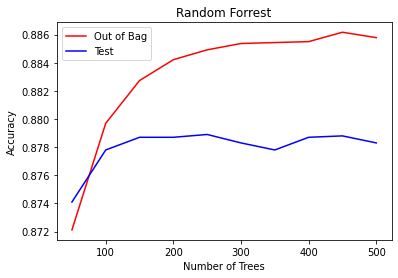

In [ ]:
N_list = list(range(50,501,50))
oob_scores = [0.8721166666666667, 0.8797, 0.8827333333333334, 0.8842166666666667, 0.8849166666666667, 0.8853666666666666, 0.8854333333333333, 0.8855, 0.8861666666666667, 0.8857833333333334]
test_scores = [0.8741, 0.8778, 0.8787, 0.8787, 0.8789, 0.8783, 0.8778, 0.8787, 0.8788, 0.8783]

plt.plot(N_list, oob_scores, label = 'Out of Bag',color = 'r')
plt.plot(N_list, test_scores, label = 'Test',color = 'b')
plt.legend()
plt.title('Random Forrest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy');

400 0.8866333333333334 0.8768
410 0.8856833333333334 0.8779
420 0.8860333333333333 0.8787
430 0.8855166666666666 0.879
440 0.8858 0.8791
450 0.8856666666666667 0.8788
460 0.8854666666666666 0.8797
470 0.8858 0.8782
480 0.8868166666666667 0.8781
490 0.8864833333333333 0.8782
500 0.88605 0.8772
[0.8866333333333334, 0.8856833333333334, 0.8860333333333333, 0.8855166666666666, 0.8858, 0.8856666666666667, 0.8854666666666666, 0.8858, 0.8868166666666667, 0.8864833333333333, 0.88605]
[0.8768, 0.8779, 0.8787, 0.879, 0.8791, 0.8788, 0.8797, 0.8782, 0.8781, 0.8782, 0.8772]


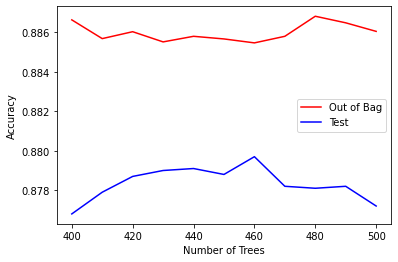

In [ ]:
"""
#Between 400-500 has the best
oob_scores = []
test_scores = []
N_list = list(range(400,501,10))
for N in N_list:
    model = sklearn.ensemble.RandomForestClassifier(n_estimators = N, oob_score=True)
    model.fit(X_train,train_labels)
    oob_score = model.oob_score_
    oob_scores.append(oob_score)
    preds = model.predict(X_test)
    test_score = accuracy_score(y_true = test_labels,y_pred = preds)
    test_scores.append(test_score)
    print(N,oob_score, test_score)


print(oob_scores)
print(test_scores)
plt.plot(N_list, oob_scores, label = 'Out of Bag',color = 'r')
plt.plot(N_list, test_scores, label = 'Test',color = 'b')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy');
"""

In [ ]:
N_list = list(range(400,501,50))
oob_scores = [0.8866333333333334, 0.8856833333333334, 0.8860333333333333, 0.8855166666666666, 0.8858, 0.8856666666666667, 0.8854666666666666, 0.8858, 0.8868166666666667, 0.8864833333333333, 0.88605]

test_scores = [0.8768, 0.8779, 0.8787, 0.879, 0.8791, 0.8788, 0.8797, 0.8782, 0.8781, 0.8782, 0.8772]

plt.plot(N_list, oob_scores, label = 'Out of Bag',color = 'r')
plt.plot(N_list, test_scores, label = 'Test',color = 'b')
plt.legend()
plt.title('Random Forrest')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy');

In [ ]:
#460 worked best
mf_list = ['auto', 'sqrt', 'log2',20,30,35] #max_features
oob_scores = []
test_scores = []
N = 460

for mf in mf_list:
    model = sklearn.ensemble.RandomForestClassifier(n_estimators = N, max_features = mf,oob_score=True)
    model.fit(X_train,train_labels)
    oob_score = model.oob_score_
    oob_scores.append(oob_score)
    preds = model.predict(X_test)
    test_score = accuracy_score(y_true = test_labels,y_pred = preds)
    test_scores.append(test_score)
    print(mf,oob_score, test_score)

print(oob_scores)
print(test_scores)

"""
auto 0.8863166666666666 0.8778
sqrt 0.8852 0.8781
log2 0.8813 0.8726
20 0.8848833333333334 0.8774
30 0.8871666666666667 0.8787
35 0.886 0.8797
[0.8863166666666666, 0.8852, 0.8813, 0.8848833333333334, 0.8871666666666667, 0.886]
[0.8778, 0.8781, 0.8726, 0.8774, 0.8787, 0.8797]
"""

auto 0.8863166666666666 0.8778
sqrt 0.8852 0.8781
log2 0.8813 0.8726
20 0.8848833333333334 0.8774
30 0.8871666666666667 0.8787
35 0.886 0.8797
[0.8863166666666666, 0.8852, 0.8813, 0.8848833333333334, 0.8871666666666667, 0.886]
[0.8778, 0.8781, 0.8726, 0.8774, 0.8787, 0.8797]
